# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
270596,2020-09-28,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270597,2020-09-29,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270598,2020-09-30,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270599,2020-10-01,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270600,2020-10-02,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
270596,2020-09-28,Colombia,Vichada,14,0,0,14
270597,2020-09-29,Colombia,Vichada,14,0,0,14
270598,2020-09-30,Colombia,Vichada,14,0,0,14
270599,2020-10-01,Colombia,Vichada,14,0,0,14
270600,2020-10-02,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
193,2020-09-28,25335,2282,406,22647
194,2020-09-29,25547,2361,407,22779
195,2020-09-30,25741,2377,408,22956
196,2020-10-01,25973,2417,409,23147
197,2020-10-02,26169,2330,409,23430


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-09-28,33042681,9213089,996254,22833338,0.015075,0.345513,0.041807
2020-09-29,33320782,9264532,1002103,23054147,0.015037,0.345942,0.041657
2020-09-30,33640128,9339087,1008311,23292730,0.014987,0.346205,0.041493
2020-10-01,33948136,9435961,1016825,23495350,0.014976,0.346048,0.041482
2020-10-02,33948800,9435227,1016839,23496734,0.014976,0.346061,0.041481


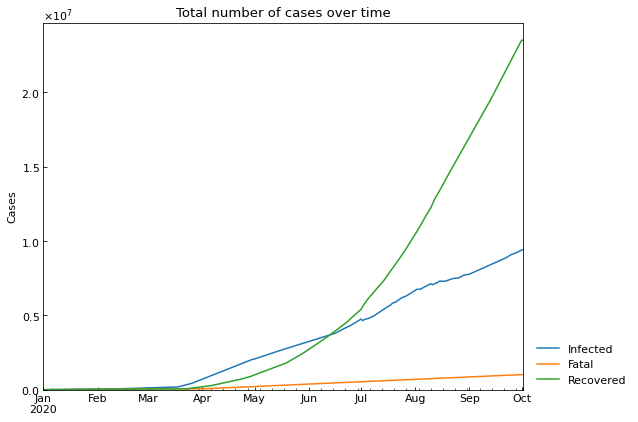

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
232,2020-09-28,82499,5969,1560,74970
233,2020-09-29,83027,6022,1567,75438
234,2020-09-30,83604,6032,1574,75998
235,2020-10-01,84236,6087,1582,76567
236,2020-10-02,84778,5989,1593,77196


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
230,2020-09-28,82131,5593,1548,74990
231,2020-09-29,82494,5478,1557,75459
232,2020-09-30,83010,5421,1564,76025
233,2020-10-01,83563,5402,1571,76590
234,2020-10-02,84215,5418,1578,77219


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
270596,2020-09-28,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270597,2020-09-29,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270598,2020-09-30,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270599,2020-10-01,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270600,2020-10-02,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
231111,COL,Colombia,Vichada,2020-09-28,107808
231112,COL,Colombia,Vichada,2020-09-29,107808
231113,COL,Colombia,Vichada,2020-09-30,107808
231114,COL,Colombia,Vichada,2020-10-01,107808
231115,COL,Colombia,Vichada,2020-10-02,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
270596,2020-09-28,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270597,2020-09-29,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270598,2020-09-30,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270599,2020-10-01,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
270600,2020-10-02,14.0,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
270596,2020-09-28,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
270597,2020-09-29,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
270598,2020-09-30,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
270599,2020-10-01,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
270600,2020-10-02,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
271,2020-09-28,1,1,1,0,0,1,1,3,2,2,1,37.04
272,2020-09-29,1,1,1,0,0,1,1,3,2,2,1,37.04
273,2020-09-30,1,1,1,0,0,1,1,3,2,2,1,37.04
274,2020-10-01,1,1,1,0,0,1,1,3,2,2,1,37.04
275,2020-10-02,1,1,1,0,0,1,1,3,2,2,1,37.04


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
271,2020-09-28,1,1,1,0,0,1,1,3,2,2,1,37.04
272,2020-09-29,1,1,1,0,0,1,1,3,2,2,1,37.04
273,2020-09-30,1,1,1,0,0,1,1,3,2,2,1,37.04
274,2020-10-01,1,1,1,0,0,1,1,3,2,2,1,37.04
275,2020-10-02,1,1,1,0,0,1,1,3,2,2,1,37.04


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

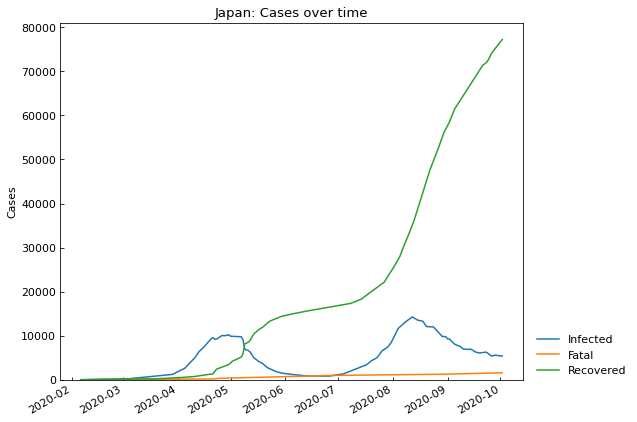

,Date,Confirmed,Infected,Fatal,Recovered
230,2020-09-28,82131,5593,1548,74990
231,2020-09-29,82494,5478,1557,75459
232,2020-09-30,83010,5421,1564,76025
233,2020-10-01,83563,5402,1571,76590
234,2020-10-02,84215,5418,1578,77219


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

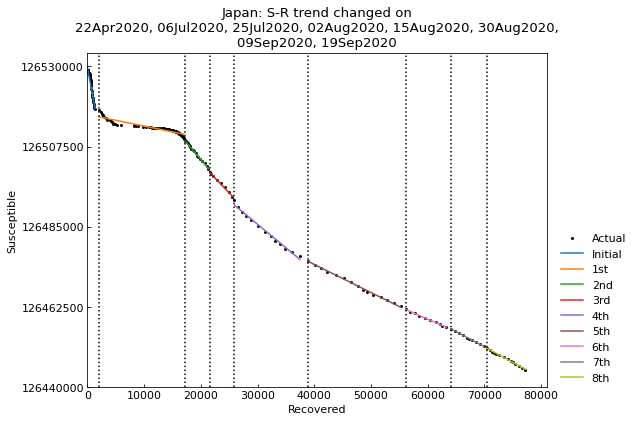

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,05Jul2020,126529100
2nd,Past,06Jul2020,24Jul2020,126529100
3rd,Past,25Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,14Aug2020,126529100
5th,Past,15Aug2020,29Aug2020,126529100
6th,Past,30Aug2020,08Sep2020,126529100
7th,Past,09Sep2020,18Sep2020,126529100
8th,Past,19Sep2020,02Oct2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	8th phase (19Sep2020 - 02Oct2020): finished 1737 trials in 1 min  0 sec

	2nd phase (06Jul2020 - 24Jul2020): finished 1172 trials in 0 min 30 sec

	0th phase (06Feb2020 - 21Apr2020): finished 1860 trials in 1 min  0 sec

	1st phase (22Apr2020 - 05Jul2020): finished 1883 trials in 1 min  0 sec

	3rd phase (25Jul2020 - 01Aug2020): finished 1965 trials in 1 min  0 sec

	6th phase (30Aug2020 - 08Sep2020): finished  253 trials in 0 min  5 sec

	7th phase (09Sep2020 - 18Sep2020): finished  461 trials in 0 min 10 sec

	4th phase (02Aug2020 - 14Aug2020): finished 1959 trials in 1 min  0 sec

	5th phase (15Aug2020 - 29Aug2020): finished 1693 trials in 0 min 50 sec

Completed optimization. Total: 2 min 52 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/beta [day],alpha1 [-],1/alpha2 [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,4.30,0.019837,0.000066,0.034879,0.007885,480,9,0.020,5064,42,0.948305,1860,1 min 0 sec
1st,Past,22Apr2020,05Jul2020,126529100,SIR-F,0.40,0.093757,0.000142,0.010587,0.023927,480,31,0.094,2343,13,0.955179,1883,1 min 0 sec
2nd,Past,06Jul2020,24Jul2020,126529100,SIR-F,1.93,0.000938,0.000031,0.046598,0.024071,480,7,0.001,10658,13,0.031944,1172,0 min 30 sec
3rd,Past,25Jul2020,01Aug2020,126529100,SIR-F,1.62,0.000454,0.000084,0.043310,0.026672,480,7,0.000,3970,12,0.016306,1965,1 min 0 sec
4th,Past,02Aug2020,14Aug2020,126529100,SIR-F,1.49,0.000235,0.000131,0.034510,0.022957,480,9,0.000,2544,14,0.064337,1959,1 min 0 sec
5th,Past,15Aug2020,29Aug2020,126529100,SIR-F,0.80,0.000530,0.000290,0.027540,0.034007,480,12,0.001,1150,9,0.026512,1693,0 min 50 sec
6th,Past,30Aug2020,08Sep2020,126529100,SIR-F,0.70,0.016500,0.000191,0.020366,0.028504,480,16,0.017,1740,11,0.014900,253,0 min 5 sec
7th,Past,09Sep2020,18Sep2020,126529100,SIR-F,0.84,0.017280,0.000005,0.027759,0.032581,480,12,0.017,73093,10,0.013478,461,0 min 10 sec
8th,Past,19Sep2020,02Oct2020,126529100,SIR-F,0.91,0.000096,0.000355,0.028629,0.031252,480,11,0.000,939,10,0.030047,1737,1 min 0 sec


### Accuracy of estimation

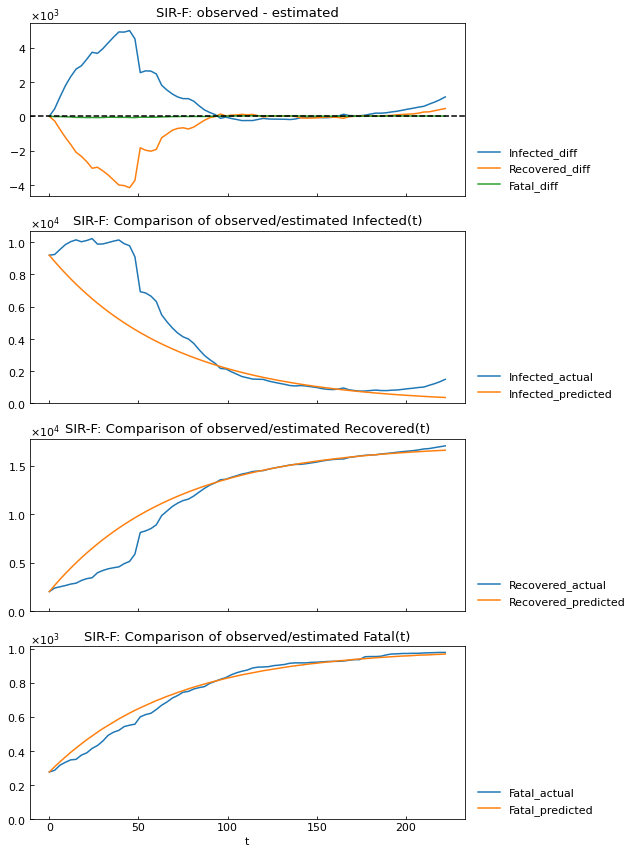

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.49

### Show parameter history

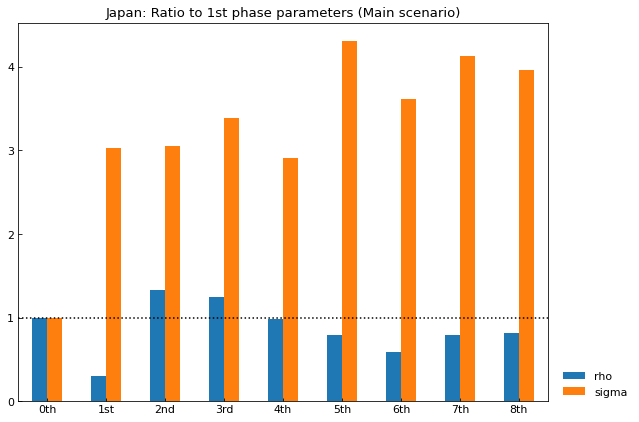

,0th,1st,2nd,3rd,4th,5th,6th,7th,8th
rho,1.0,0.303537,1.335993,1.241719,0.989414,0.789582,0.583915,0.795860,0.820809
sigma,1.0,3.034272,3.052511,3.382414,2.911338,4.312564,3.614722,4.131719,3.963258


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

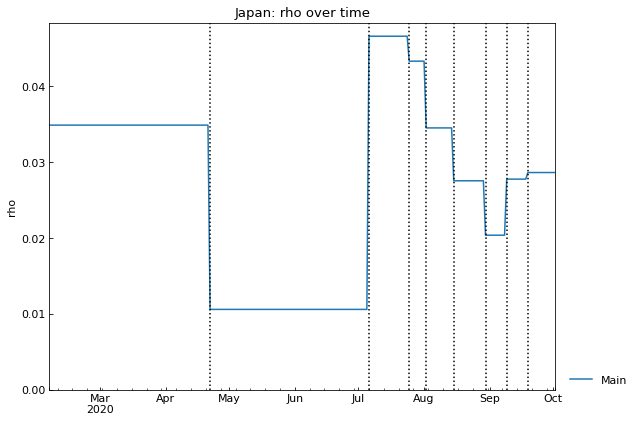

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

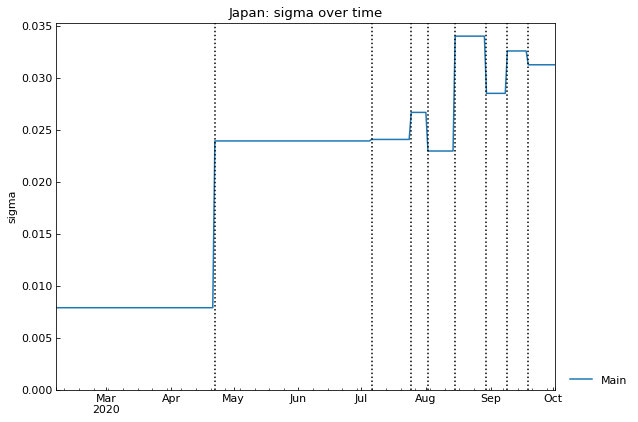

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

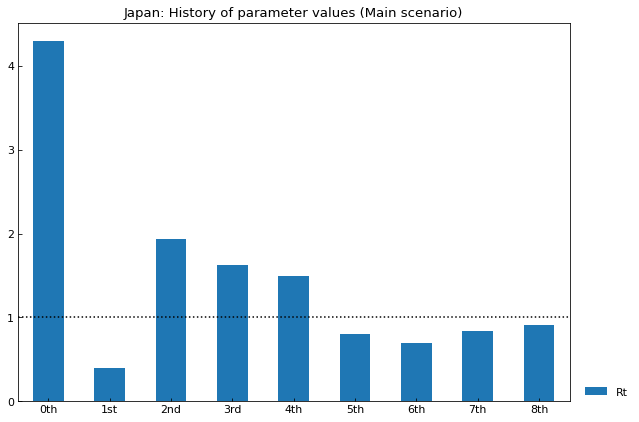

,0th,1st,2nd,3rd,4th,5th,6th,7th,8th
Rt,4.3,0.4,1.93,1.62,1.49,0.8,0.7,0.84,0.91


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

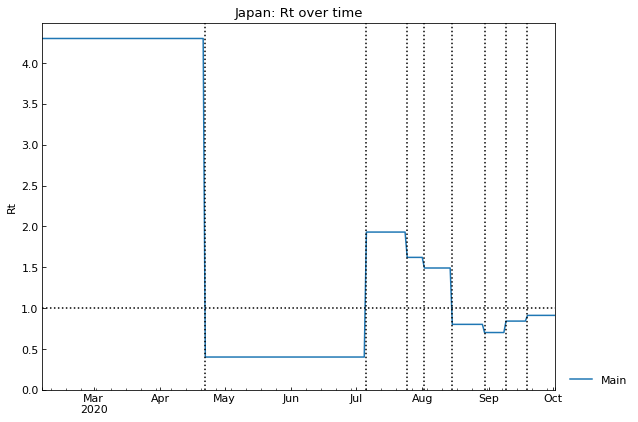

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

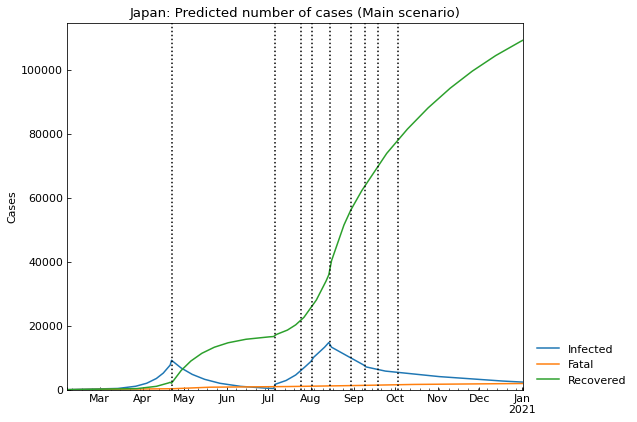

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,112698,1928,2449,108321
328,2020-12-30,112907,1931,2427,108549
329,2020-12-31,113114,1933,2405,108776
330,2021-01-01,113320,1936,2384,109000
331,2021-01-02,113523,1938,2362,109223


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.031252257619225045

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.06250451523845009

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.30   
         1st      Past  22Apr2020  05Jul2020   126529100  SIR-F  0.40   
         2nd      Past  06Jul2020  24Jul2020   126529100  SIR-F  1.93   
         3rd      Past  25Jul2020  01Aug2020   126529100  SIR-F  1.62   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.49   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.80   
         6th      Past  30Aug2020  08Sep2020   126529100  SIR-F  0.70   
         7th      Past  09Sep2020  18Sep2020   126529100  SIR-F  0.84   
         8th      Past  19Sep2020  02Oct2020   126529100  SIR-F  0.91   
         9th    Future  03Oct2020  01Jan2021   126529100  SIR-F  0.91   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.30   
         1st      Past  22Apr2020  05Jul2020   126529100  SIR-F  0.40   
         2nd      Past  06Jul2020  24Jul2020   126529100  SIR-F  1.93   
         3rd      Past  25Jul2020  01Aug2020   126529100  SIR-F  1.62   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.49   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.80   
         6th      Past  30Aug2020  08Sep2020   126529100  SIR-F  0.70   
         7th      Past  09Sep2020  18Sep2020   126529100  SIR-F  0.84   
         8th      Past  19Sep2020  02Oct2020   126529100  SIR-F  0.91   
         9th    Future  03Oct2020  01Nov2020   126529100  SIR-F  0.91   
         10th   Future  02Nov2020  01Jan2021   126529100  SIR-F  0.46   

                   theta     kappa       rho     sigma  tau  1/beta [day]  \
Scenario Phase                                                              
Main     0th    0.019837  0.000066  0.034879  0.007885  480             9   
         1st    0.093757  0.000142  0.010587  0.023927  480            31   
         2nd    0.000938  0.000031  0.046598  0.024071  480             7   
         3rd    0.000454  0.000084  0.043310  0.026672  480             7   
         4th    0.000235  0.000131  0.034510  0.022957  480             9   
         5th    0.000530  0.000290  0.027540  0.034007  480            12   
         6th    0.016500  0.000191  0.020366  0.028504  480            16   
         7th    0.017280  0.000005  0.027759  0.032581  480            12   
         8th    0.000096  0.000355  0.028629  0.031252  480            11   
         9th    0.000096  0.000355  0.028629  0.031252  480            11   
Medicine 0th    0.019837  0.000066  0.034879  0.007885  480             9   
         1st    0.093757  0.000142  0.010587  0.023927  480            31   
         2nd    0.000938  0.000031  0.046598  0.024071  480             7   
         3rd    0.000454  0.000084  0.043310  0.026672  480             7   
         4th    0.000235  0.000131  0.034510  0.022957  480             9   
         5th    0.000530  0.000290  0.027540  0.034007  480            12   
         6th    0.016500  0.000191  0.020366  0.028504  480            16   
         7th    0.017280  0.000005  0.027759  0.032581  480            12   
         8th    0.000096  0.000355  0.028629  0.031252  480            11   
         9th    0.000096  0.000355  0.028629  0.031252  480            11   
         10th   0.000096  0.000355  0.028629  0.062505  480            11   

                alpha1 [-]  1/alpha2 [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                
Main     0th         0.020            5064             42   0.948305   1860   
         1st         0.094            2343             13   0.955179   1883   
         2nd         0.001           10658             13  0.0319437   1172   
         3rd         0.000            3970             12  0.0163058   1965   
         4th         0.000            2544             14  0.0643374   1959   
         5th 

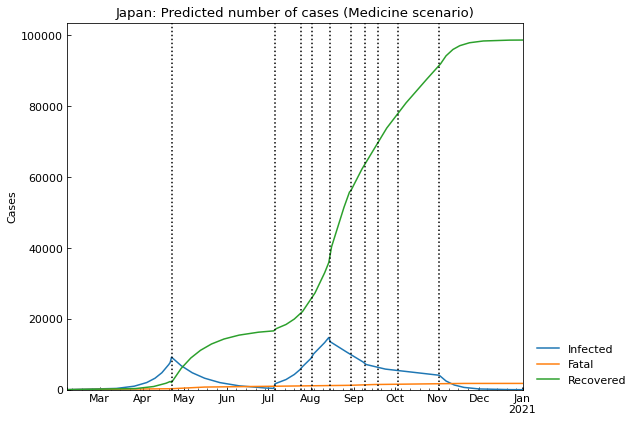

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,100450,1775,12,98663
328,2020-12-30,100451,1775,11,98665
329,2020-12-31,100452,1775,10,98667
330,2021-01-01,100453,1775,9,98669
331,2021-01-02,100453,1775,8,98670


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,10th_Rt
Main,14731,14Aug2020,2362,1938,-
Medicine,14731,14Aug2020,8,1775,0.46


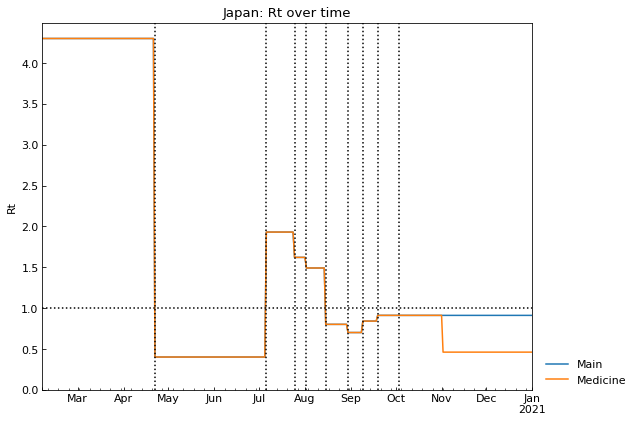

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

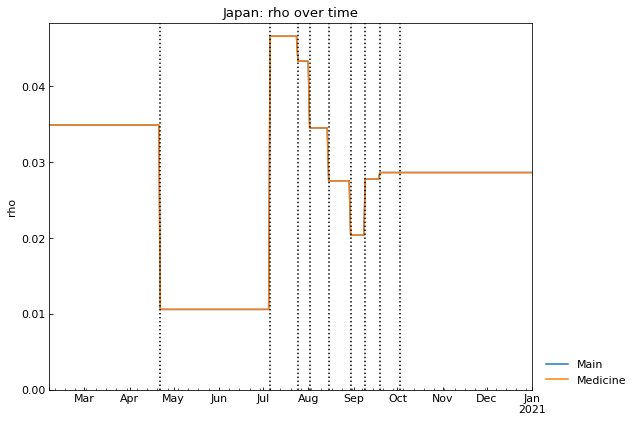

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

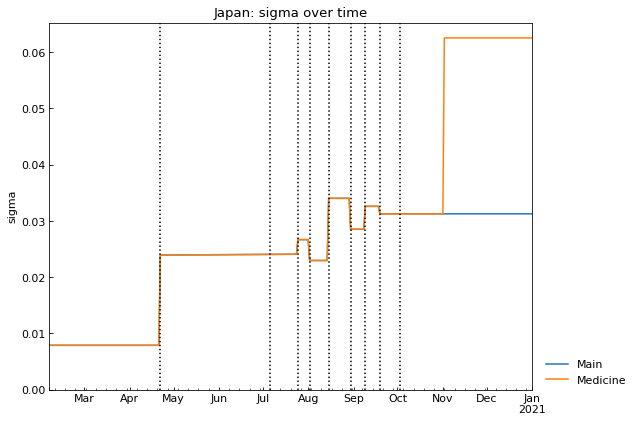

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

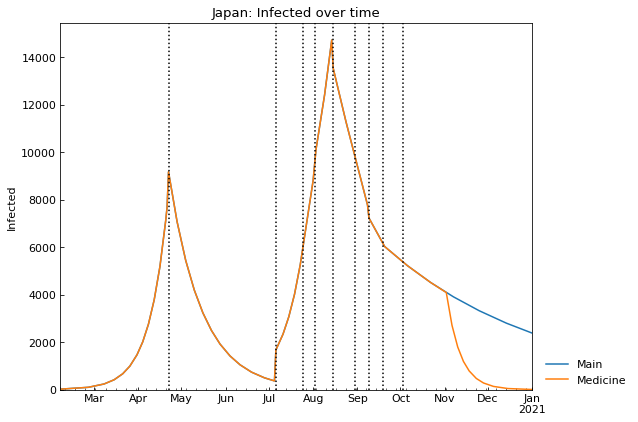

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")